#### 台灣的飲料店購買紀錄資料集


>#### 產生資料
利用ChatGPT, Copilot

#### 問題1：*台灣飲料店有哪些可蒐集的資訊*

**1. 品牌資訊**
<ul>
    <li>✅連鎖品牌：如 珍煮丹、春陽茶事、五十嵐、大苑子、清心福全 等。
    <li>新興品牌：如 茶湯會、COMEBUY、迷客夏、老虎堂。
    <li>地方特色品牌：如一些只有某個城市或地區特有的小型飲料店。
</ul>

**2. 飲品種類**
<ul>
    <li>手搖茶類：包含珍珠奶茶、綠茶、紅茶、烏龍茶。
    <li>果汁類：如檸檬汁、鮮榨果汁或果醋飲品。
    <li>健康飲品：低糖、無糖、無添加物飲品，如燕麥奶、穀物茶。
    <li>特色飲品：如起司奶蓋茶、氣泡飲、酒精風味飲料。
</ul>

**3. 菜單與價格**
<ul>
    <li>✅不同飲料店的 菜單設計 和定價策略。
    <li>期間限定商品或季節限定飲品。
    <li>✅多種大小、甜度、冰塊量的客製化選項。
</ul>

**4. 原料與品質**
<ul>
    <li>珍珠、寒天、芋圓等配料是否手工製作。
    <li>茶葉來源：如台灣本地茶葉（阿里山茶、梨山茶）或進口茶葉。
    <li>是否強調使用有機或天然原料。
</ul>

**5. 店內設計與品牌形象**
<ul>
    <li>內部裝潢：風格是否現代、復古或具文化特色。
    <li>品牌識別：LOGO、店員制服、杯子設計。
    <li>是否有主題分店或限定裝飾。
</ul>

**6. 服務與創新**
<ul>
    <li>數位化服務：如 APP 預訂、會員點數制度。
    <li>環保措施：是否提供可重複使用杯子折扣或環保吸管。
    <li>特殊活動：如買一送一、推出新口味試喝活動。
</ul>

**7. 市場與文化**
<ul>
    <li>受歡迎的品牌排名：網路上常見的投票或調查。
    <li>社群互動：是否與消費者有密切互動（如 IG、Facebook 活動）。
    <li>影響力：是否曾在國際媒體上曝光。
</ul>

**8. 客群分析**
<ul>
    <li>✅客戶年齡層：年輕族群 vs 全家適用。
    <li>是否有特定受眾（如素食主義者、健身族群）。
</ul>

>#### 資料生成範例（初版）
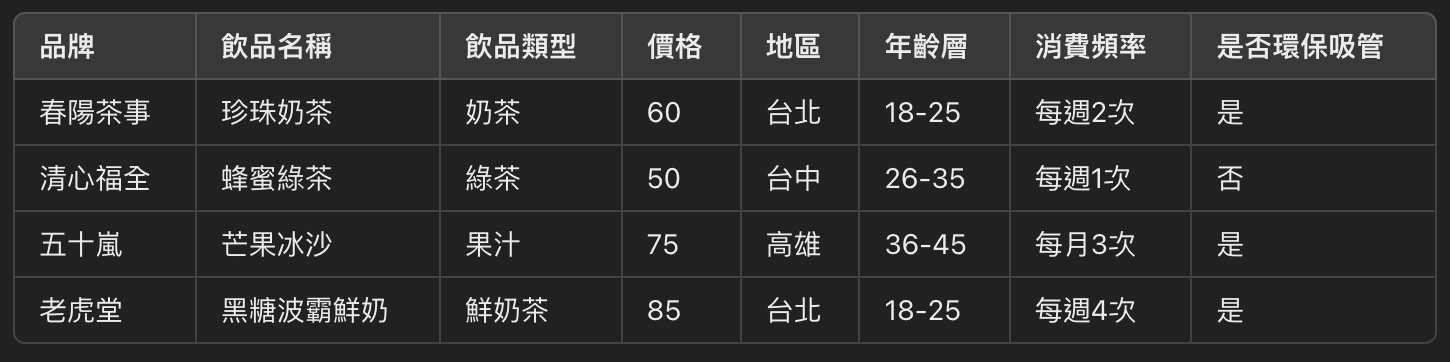

>#### 資料調整與規定
幫我生成資料集，資料筆數為1000：
<li>1.不需要「是否環保吸管」、「飲品類型」
<li>2.年齡層改為精確的年齡數字
<li>3.新增「甜度」、「冰塊」、「性別」項目
<li>4.資料改為類似購買紀錄的方式
<li>5.品牌與飲品項目新增到各10個
<li>6.飲料店營業時間為早上10點到晚上10點，時間不需要秒
<li>7.同一品牌同一品項在相同地區價格須相同
<li>8.價格請幫我改為5的倍數，相同品項在各地區的價格差異請控制在15以內
<li>9.年齡對於消費次數的頻率影響
<li>10.地區與季節溫度對於冰塊調整的變化


>#### 資料生成範例（最後版本）
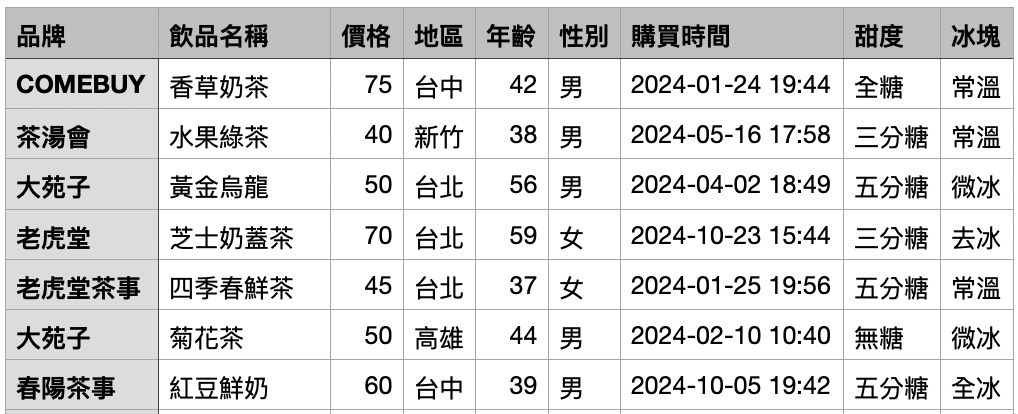

>#### 程式碼：產生資料

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# 擴展的品牌與飲品清單
liands_expanded = ["春陽茶事", "清心福全", "五十嵐", "老虎堂", "茶湯會", "珍煮丹", "大苑子", "迷客夏", "COMEBUY", "老虎堂茶事"]
drink_items_expanded = {
    "春陽茶事": ["珍珠奶茶", "蜂蜜綠茶", "芋頭鮮奶", "紅豆鮮奶", "青蘋果茶", "四季春茶", "檸檬烏龍茶", "冰釀茶", "蜜香奶茶", "檸檬珍珠綠茶"],
    "清心福全": ["檸檬紅茶", "寒天愛玉", "冬瓜茶", "紅豆抹茶鮮奶", "無糖烏龍", "手搖柚子茶", "茉莉花茶", "黃金蘋果茶", "藍莓養生茶", "檸檬多多"],
    "五十嵐": ["四季春青茶", "奶蓋紅茶", "黑糖珍珠鮮奶", "黃金蔓越莓茶", "鹽味焦糖奶茶", "波霸冰鎮鮮奶", "檸檬蜜茶", "藍莓鮮奶茶", "芒果綠茶", "小紅莓茶"],
    "老虎堂": ["黑糖波霸鮮奶", "芝士奶蓋茶", "桂花烏龍", "黑糖紅茶", "杏仁茶", "焦糖瑪奇朵", "芋頭冰沙", "香蕉奶昔", "楓糖奶蓋茶", "焦糖波霸鮮奶"],
    "茶湯會": ["水果綠茶", "抹茶拿鐵", "百香果雙響炮", "藍莓冰茶", "紅寶石鮮奶茶", "蘋果紅茶", "金桔檸檬茶", "火龍果冰沙", "芒果冰沙", "鮮橙茶"],
    "珍煮丹": ["黑糖珍珠鮮奶", "原味珍珠奶茶", "冬瓜鮮奶", "黑糖牛奶", "奶蓋茶", "蜂蜜檸檬茶", "檸檬薰衣草茶", "烏龍茶", "抹茶拿鐵", "杏仁紅茶"],
    "大苑子": ["綠茶拿鐵", "木瓜牛奶", "玫瑰花茶", "冰醇綠茶", "草莓奶蓋", "檸檬青茶", "菊花茶", "蘋果紅茶", "黃金烏龍", "香草抹茶"],
    "迷客夏": ["鮮果綠茶", "冬瓜綠茶", "黑糖鮮奶茶", "冰釀紅茶", "蜂蜜檸檬水", "抹茶紅豆奶茶", "檸檬茶", "芋頭冰沙", "焦糖奶茶", "杏仁果凍紅茶"],
    "COMEBUY": ["黃金泡沫奶茶", "綠茶鮮奶", "藍莓水果茶", "小紅莓檸檬茶", "黑糖鮮奶茶", "蘋果綠茶", "香草奶茶", "抹茶鮮奶", "小珍珠奶茶", "橙香綠茶"],
    "老虎堂茶事": ["四季春鮮茶", "極品抹茶拿鐵", "紅豆鮮奶", "菊花檸檬茶", "紫薯鮮奶", "西柚鮮果茶", "焦糖鮮奶茶", "蜜桃茶", "熱杏仁紅茶", "水果冰沙"]
}
regions = ["台北", "台中", "高雄", "台南", "新竹"]
sweetness_levels = ["全糖", "七分糖", "五分糖", "三分糖", "無糖"]
ice_levels = ["全冰", "微冰", "去冰", "少冰"]
genders = ["男", "女"]

# 設置不同地區和季節的平均氣溫 (假設數值，您可以根據實際情況進行調整)
season_temperature = {
    "台北": {"春": 20, "夏": 30, "秋": 25, "冬": 15},
    "台中": {"春": 22, "夏": 32, "秋": 27, "冬": 17},
    "高雄": {"春": 25, "夏": 33, "秋": 28, "冬": 20},
    "台南": {"春": 24, "夏": 31, "秋": 27, "冬": 19},
    "新竹": {"春": 18, "夏": 28, "秋": 23, "冬": 14}
}

# 年齡消費倍率（影響消費次數）
age_purchase_multiplier = {
    (18, 29): 1.0,
    (30, 39): 1.2,
    (40, 49): 1.4,
    (50, 60): 1.6
}

# 建立價格表以控制價格一致性
price_table = {}
data = []

# 計算每個年齡段的購買次數
for _ in range(1000):
    liand = random.choice(liands_expanded)
    drink = random.choice(drink_items_expanded[liand])
    region = random.choice(regions)
    
    key_item = (liand, drink, region)  # 品牌、飲品名稱和地區作為唯一鍵
    
    # 如果該品牌和飲品的基準價格尚未設定，則隨機生成一個基準價格
    if key_item not in price_table:
        base_price = random.randint(40, 100)
        base_price = base_price - (base_price % 5)  # 調整為5的倍數
        price_table[key_item] = base_price
    
    # 使用基準價格作為當前地區的價格
    base_price = price_table[key_item]
    
    age = random.randint(18, 60)
    gender = random.choice(genders)
    
    # 根據年齡調整購買次數
    for age_range, multiplier in age_purchase_multiplier.items():
        if age_range[0] <= age <= age_range[1]:
            purchases = int(1 * multiplier)
            break
    
    for _ in range(purchases):
        # 生成隨機購買時間
        purchase_date = datetime(2024, 1, 1) + timedelta(days=random.randint(0, 364))
        purchase_time = purchase_date + timedelta(hours=random.randint(10, 21), minutes=random.randint(0, 59))
        purchase_time = purchase_time.replace(second=0, microsecond=0)
        
        # 根據購買日期確定季節
        month = purchase_date.month
        if month in [3, 4, 5]:
            season = "春"
        elif month in [6, 7, 8]:
            season = "夏"
        elif month in [9, 10, 11]:
            season = "秋"
        else:
            season = "冬"
        
        # 根據地區和季節的氣溫調整冰塊選擇
        temperature = season_temperature[region][season]
        if temperature >= 30:
            ice = random.choice(["全冰", "微冰"])
        elif temperature >= 25:
            ice = random.choice(["全冰", "微冰", "少冰"])
        else:
            ice = random.choice(["微冰", "去冰", "少冰"])
        
        sweetness = random.choice(sweetness_levels)
        
        data.append([liand, drink, round(base_price, 2), region, age, gender, purchase_time.strftime("%Y-%m-%d %H:%M"), sweetness, ice])

# 創建 DataFrame
df = pd.DataFrame(data, columns=["品牌", "飲品名稱", "價格", "地區", "年齡", "性別", "購買時間", "甜度", "冰塊"])

# 保存為 CSV 文件
file_path = "台灣飲料店購買紀錄資料集.csv"
df.to_csv(file_path, index=False, encoding="utf-8-sig")
print(f"資料集已保存為 {file_path}")


>#### 預計產生的觀點
利用Copilot的建議，可以產生以下觀點：<br>

**1.價格趨勢分析**
<ul> 
    <li>✅不同地區的價格變化</li> 
    <li>各品牌之間的價格差異</li> 
    <li>甜度、冰塊等選項對價格的影響</li> 
</ul> 

**2.顧客行為分析**
<ul>
    <li>各地區、年齡層及性別的偏好</li> 
    <li>✅不同時間段的購買習慣（如高峰時段與低峰時段</li> 
    <li>消費者在不同品牌和飲品之間的選擇偏好</li> 
</ul> 

**3.銷售量分析**
<ul> 
    <li>✅各品牌在不同地區的銷售量</li> 
    <li>不同飲品在各地區的受歡迎程度</li> 
    <li>季節性或節假日銷售模式（如夏季和冬季飲品的銷售趨勢</li> 
</ul> 

**4.市場競爭分析**
<ul> 
    <li>各品牌在市場上的競爭力</li> 
    <li>各地區市場的供需情況</li> 
    <li>主要競爭對手的價格戰策略</li> 
</ul> 

**5.顧客服務質量分析**
<ul> 
    <li>顧客對飲品的滿意度</li> 
    <li>甜度和冰塊選項的滿意度</li> 
    <li>顧客服務回饋及改善空間</li> 
</ul>

>#### 資料統計

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv, dotenv_values
load_dotenv()
# Reading a CSV file
csv_file_path = '台灣飲料店購買紀錄資料集.csv'
df = pd.read_csv(csv_file_path)


In [ ]:
%pip install pandas langchain langchain_experimental langchain-groq openai langchain-openai seaborn


In [ ]:
from langchain_groq import ChatGroq
from langchain_openai import OpenAI
from langchain_experimental.agents.agent_toolkits import create_csv_agent

groq_api = os.getenv("GROQ_API_KEY")
openai_api_key = os.getenv("CHATGPT_API_KEY")
llm = ChatGroq(temperature=0, model="llama3-70b-8192", api_key=groq_api)
llm_openai = OpenAI(temperature=0, model="gpt-4o-mini",api_key=openai_api_key)

# Create the CSV agent
agent = create_csv_agent(llm, csv_file_path, verbose=True, allow_dangerous_code=True)
agent_openai = create_csv_agent(llm_openai, csv_file_path, verbose=True, allow_dangerous_code=True)


def query_data(query):
    response = agent.invoke(query)
    return response

def query_data_openai(query):
    response = agent_openai.invoke(query)
    return response

In [ ]:
# 定義地區翻譯字典
region_translation = {
    '台北': 'Taipei',
    '台中': 'Taichung',
    '高雄': 'Kaohsiung',
    '台南': 'Tainan',
    '新竹': 'Hsinchu'
}

# 使用 replace 方法將地區名稱改為英文，並產生新的 DataFrame
df_english = df.copy()
df_english['地區'] = df_english['地區'].replace(region_translation)

# 顯示前幾行以確認更改
print(df_english.head())

---
#### 分析1：不同地區的價格變化

In [ ]:
# 設置SimHei字體
csfont = {'fontname':'SimHei'}

# 繪製箱型圖
plt.figure(figsize=(14, 8))
sns.boxplot(x='地區', y='價格', data=df_english)
plt.title('不同地區的價格分佈', **csfont, fontsize=15)
plt.xlabel('地區', **csfont, fontsize=12)
plt.ylabel('價格', **csfont, fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# 顯示箱型圖
plt.show()


---
#### 分析2：不同時間段的購買習慣（如高峰時段與低峰時段

In [ ]:
query = "請將所有日期的購買數量依據一天24小時排序，並且把結果繪製成圖表，縱軸改成杯數"
response = query_data(query)
print(response)

In [ ]:
query = "請將同一月分的所有訂單數量加總，並且把結果依據時間以月為單位，繪製成圖表,xlabel:Month,ylabel:Total Orders"
response = query_data(query)
print(response)

In [ ]:
#略過 OpenAI 的部分，API呼叫次數有限制
# query = "請分析不同時間段的購買習慣（如高峰時段與低峰時段），並且把結果繪製成圖表"
# response = query_data_openai(query)
# print(response)

---
#### 分析3：各品牌在不同地區的銷售量

In [ ]:
#設定並匯入中文字體
import matplotlib
print(matplotlib.get_data_path())
print(matplotlib.get_cachedir())

In [ ]:
#刪除cache
!rm -r /Users/benstin/.matplotlib

In [ ]:
csfont = {'fontname':'SimHei'}



# 計算各品牌在不同地區的銷售量
sales_count = df_english.groupby(['品牌', '地區']).size().reset_index(name='銷售量')

# 設置繪圖樣式
sns.set(style="whitegrid")

# 繪製圖表
plt.figure(figsize=(12, 8))
sns.barplot(x='地區', y='銷售量', hue='品牌', data=sales_count)
plt.title('各品牌在不同地區的銷售量比較', **csfont)
plt.xlabel('地區', **csfont)
plt.ylabel('銷售量', **csfont)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'family': 'SimHei'})
plt.tight_layout()

# 顯示圖表
plt.show()


---
#### 分析4：不同地區飲料的甜度比較

In [ ]:
# 設置SimHei字體
csfont = {'fontname':'SimHei'}

# 計算每個地區不同甜度的飲料銷售量
sweetness_count = df_english.groupby(['地區', '甜度']).size().reset_index(name='銷售量')

# 設置繪圖樣式
sns.set(style="whitegrid")

# 指定甜度的順序
sweetness_order = ['全糖', '七分糖', '五分糖', '三分糖', '無糖']

# 繪製圖表
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='地區', y='銷售量', hue='甜度', data=sweetness_count, hue_order=sweetness_order)

# 設置標題和標籤的字體
plt.title('不同地區飲料的甜度比較', **csfont, fontsize=15)
plt.xlabel('地區', **csfont, fontsize=12)
plt.ylabel('銷售量', **csfont, fontsize=12)

# 設置圖例字體
plt.legend(title='Sweetness', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'family': 'SimHei'})
plt.xticks(rotation=0)  # 確保x軸標籤不旋轉
plt.yticks(rotation=0)  # 確保y軸標籤不旋轉
plt.tight_layout()

# 顯示圖表
plt.show()


---
#### 分析5：不同地區飲料的冰塊比較

In [ ]:
# 設置SimHei字體
csfont = {'fontname':'SimHei'}

# 計算每個地區不同冰塊的飲料銷售量
ice_count = df_english.groupby(['地區', '冰塊']).size().reset_index(name='銷售量')

# 設置繪圖樣式
sns.set(style="whitegrid")

# 指定冰塊的順序
ice_order = ['全冰', '少冰', '微冰', '去冰']

# 繪製圖表
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='地區', y='銷售量', hue='冰塊', data=ice_count, hue_order=ice_order)

# 設置標題和標籤的字體
plt.title('不同地區飲料的冰塊比較', **csfont, fontsize=15)
plt.xlabel('地區', **csfont, fontsize=12)
plt.ylabel('銷售量', **csfont, fontsize=12)

# 設置圖例字體
plt.legend(title='Ice Level', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'family': 'SimHei'})
plt.xticks(rotation=0)  # 確保x軸標籤不旋轉
plt.yticks(rotation=0)  # 確保y軸標籤不旋轉
plt.tight_layout()

# 顯示圖表
plt.show()


---
#### 分析6：年齡對於消費次數的關係

In [ ]:
query = "請問年齡對於消費次數是否有任何關係,Age請由左至右依序為年齡由小到大,xlabel:Age,ylabel:Purchase Count"
response = query_data(query)
print(response)

以下是針對6項分析的客觀結論：

1. **不同地區的價格變化**
    ```markdown
    台北和台南的飲料價格相對較高，而台中的價格分佈較為集中且偏低。這可能反映了不同地區的消費水平和市場競爭情況。
    ```

2. **不同時間段的購買習慣（如高峰時段與低峰時段）**
    ```markdown
    購買高峰時段集中在下午3點到5點之間，這段時間內的購買量顯著高於其他時段，顯示出消費者在這段時間內更傾向於購買飲料。
    ```

3. **各品牌在不同地區的銷售量**
    ```markdown
    迷客夏在台南的銷售量最高，顯示出該品牌在該地區的受歡迎程度。而老虎堂茶事在高雄的銷售量相對較低，可能需要加強在該地區的市場推廣。
    ```

4. **不同地區飲料的甜度比較**
    ```markdown
    各地區的消費者對甜度的偏好有所不同，台北和台南的消費者更偏好七分糖，而高雄的消費者對三分糖和五分糖的接受度較高。
    ```

5. **不同地區飲料的冰塊比較**
    ```markdown
    台北和台南的消費者更偏好微冰，而高雄的消費者對全冰的接受度較高，這可能與當地的氣溫和消費習慣有關。
    ```

6. **年齡對於消費次數的關係**
    ```markdown
    年齡在30至49歲之間的消費者購買次數最多，顯示出這個年齡段的消費者對飲料的需求較高，而60歲以上的消費者購買次數相對較少。
    ```